In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# for file in directory, load as pandas df
directory = '/Volumes/vosslabhpc/symposia/cpsy-25/data/beh'
files = [f for f in os.listdir(directory) if f.endswith('.csv')]
better = pd.read_csv(os.path.join(directory, 'better_dsst.csv'))

extend = pd.read_csv(os.path.join(directory, 'extend_dsst.csv'))

pacr = pd.read_csv(os.path.join(directory, 'pacr_dsst.csv'))

In [19]:
better

,participant_id,digit_symbol_total
0,120001,75.0
1,120002,76.0
2,120003,104.0
3,120004,76.0
4,120005,75.0
...,...,...
150,121028,NaN
151,121029,NaN
152,121030,NaN
153,121031,NaN


In [20]:
# for better dataframe add b- to the beginning of each row in 'participant_id' column
better['participant_id'] = 'b-' + better['participant_id'].astype(str)
better['score'] = better['digit_symbol_total']
better['id'] = better['participant_id']
better = better[['id', 'score']]
better

,id,score
0,b-120001,75.0
1,b-120002,76.0
2,b-120003,104.0
3,b-120004,76.0
4,b-120005,75.0
...,...,...
150,b-121028,NaN
151,b-121029,NaN
152,b-121030,NaN
153,b-121031,NaN


In [21]:
# for extend dataframe add e- to the beginning of each row in 'EXTEND Study ID' column and rename the column to ID
extend['id'] = 'e-' + extend['EXTEND Study ID'].astype(str)
# remove the .0 from the end of each row in 'ID' column
extend['id'] = extend['id'].str.replace('.0', '', regex=False)
extend = extend.drop(columns=['EXTEND Study ID'])
extend_second_column = extend.columns[1]
# rename the second column to 'score'
extend = extend.rename(columns={extend_second_column: 'score'})
extend = extend[['id', 'score']]
extend

,id,score
0,e-2001,NaN
1,e-2002,79.0
2,e-2003,NaN
3,e-2004,NaN
4,e-nan,NaN
...,...,...
873,e-2874,83.0
874,e-2875,NaN
875,e-2876,NaN
876,e-2877,NaN


In [22]:
# Create a new ID column by adding 'p-' to the 'PACR Study ID#:' column
pacr['id'] = 'p-' + pacr['PACR Study ID#:'].astype(str)

# Remove the .0 from the end of each row in 'ID' column
pacr['id'] = pacr['id'].str.replace('.0', '', regex=False)

# Drop the original 'PACR Study ID#:' column
pacr = pacr.drop(columns=['PACR Study ID#:'])

# Ensure the second column exists before proceeding
if pacr.shape[1] > 1:
    # Get the second column name dynamically
    second_col_name = pacr.columns[1]

    # Convert it to string and store it in 'score' column
    pacr['score'] = pacr[second_col_name].astype(str)

    # Drop the second column
    pacr = pacr.drop(columns=[second_col_name])

pacr = pacr[['id', 'score']]
pacr

,id,score
0,p-15,nan
1,p-8,77.0
2,p-41,81.0
3,p-25,76.0
4,p-12,70.0
...,...,...
102,p-203,51.0
103,p-204,83.0
104,p-206,63.0
105,p-208,64.0


In [23]:
# print len of non nan for each study
print('Better:', len(better[better['score'].notna()]))
print('Extend:', len(extend[extend['score'].notna()]))
print('PACR:', len(pacr[pacr['score'].notna()]))

Better: 65
Extend: 123
PACR: 107


In [24]:
# append all three dataframes together
df = pd.concat([better, extend, pacr], ignore_index=True)
#drop na
df = df.dropna(subset=['score'])
# drop if score value is 'nan'
df = df[df['score'] != 'nan']
# convert score to numeric
df = df.astype({'score': 'float'})
# convert id to string
df['id'] = df['id'].astype(str)
df

,id,score
0,b-120001,75.0
1,b-120002,76.0
2,b-120003,104.0
3,b-120004,76.0
4,b-120005,75.0
...,...,...
1135,p-203,51.0
1136,p-204,83.0
1137,p-206,63.0
1138,p-208,64.0


In [25]:
df.to_csv('../../../../data/struc/dsst.csv', index=False)

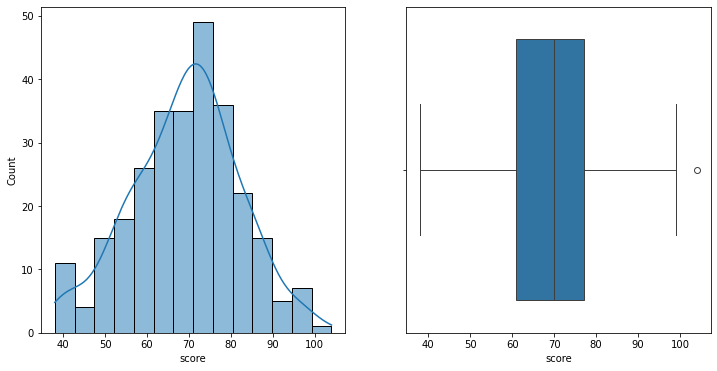

In [26]:
''' plot distribution and boxplot of dsst scores '''
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df, x='score', kde=True, ax=ax[0])
sns.boxplot(data=df, x='score', ax=ax[1])
plt.show()

In [27]:
b_df = pd.read_csv('~/Downloads/better_dsst.csv')
b_df

,Study Subject ID,Subject Status,Subject Screening Number,Site Name,Event Name(Occurrence),Event Status,Date of Assessment Visit:,Digit Symbol Coding PDF:,Form Version:,Total Correct:,Digit Symbol Coding_complete
0,120001,Enrolled,120001,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-06-28,DIgit_Symbol_120001.pdf,Form A,75,Monitoring Completed
1,120002,Enrolled,120002,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-06,Digit_Symbol_120002.pdf,Form A,76,Monitoring Completed
2,120003,Enrolled,120003,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-05,DigitSymbol_correction_120003.pdf,Form A,104,Monitoring Completed
3,120004,Enrolled,120004,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-09,DigitSymbol_120004.pdf,Form A,76,Monitoring Completed
4,120005,Enrolled,120005,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-25,DigitSymbol_120005.pdf,Form A,75,Monitoring Completed
...,...,...,...,...,...,...,...,...,...,...,...
124,121070,Enrolled,121070,University of Texas at Dallas,Baseline Visit (V1),Monitoring Completed,2019-12-06,121070_V1_DigitSymbolCodingFormA.pdf,Form A,87,Monitoring Completed
125,121071,Enrolled,121071,University of Texas at Dallas,Baseline Visit (V1),Monitoring Completed,2020-01-29,121071_V1_DigitSymbolCodingA.pdf,Form A,78,Monitoring Completed
126,121072,Enrolled,121072,University of Texas at Dallas,Baseline Visit (V1),Monitoring Completed,2020-01-24,121072_V1_DigitSymbolCodingA.pdf,Form A,59,Monitoring Completed
127,121073,Enrolled,121073,University of Texas at Dallas,Baseline Visit (V1),Monitoring Completed,2020-01-27,121073_V1_DigitSymbolCodingA.pdf,Form A,50,Monitoring Completed


In [28]:
b_df = b_df[b_df['Study Subject ID']<120076]
b_df

,Study Subject ID,Subject Status,Subject Screening Number,Site Name,Event Name(Occurrence),Event Status,Date of Assessment Visit:,Digit Symbol Coding PDF:,Form Version:,Total Correct:,Digit Symbol Coding_complete
0,120001,Enrolled,120001,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-06-28,DIgit_Symbol_120001.pdf,Form A,75,Monitoring Completed
1,120002,Enrolled,120002,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-06,Digit_Symbol_120002.pdf,Form A,76,Monitoring Completed
2,120003,Enrolled,120003,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-05,DigitSymbol_correction_120003.pdf,Form A,104,Monitoring Completed
3,120004,Enrolled,120004,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-09,DigitSymbol_120004.pdf,Form A,76,Monitoring Completed
4,120005,Enrolled,120005,University of Iowa,Baseline Visit (V1),Monitoring Completed,2018-07-25,DigitSymbol_120005.pdf,Form A,75,Monitoring Completed
...,...,...,...,...,...,...,...,...,...,...,...
56,120065,Enrolled,120065,University of Iowa,Baseline Visit (V1),Monitoring Completed,2019-08-28,120065_DSC_Corrected.pdf,Form A,92,Monitoring Completed
57,120068,Enrolled,120068,University of Iowa,Baseline Visit (V1),Monitoring Completed,2019-09-03,DigitSymbol_V1_120068.pdf,Form A,71,Monitoring Completed
58,120069,Enrolled,120069,University of Iowa,Baseline Visit (V1),Monitoring Completed,2019-09-04,DigitSymbol_V1_160069.pdf,Form A,57,Monitoring Completed
59,120073,Enrolled,120073,University of Iowa,Baseline Visit (V1),Monitoring Completed,2019-12-09,DigitSymbol_V1_120073.pdf,Form A,98,Monitoring Completed


In [29]:
b_df['Study Subject ID'] = 'b-' + b_df['Study Subject ID'].astype(str)
b_df = b_df[['Study Subject ID', 'Total Correct:']]
b_df

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_97996/3389962763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['Study Subject ID'] = 'b-' + b_df['Study Subject ID'].astype(str)


,Study Subject ID,Total Correct:
0,b-120001,75
1,b-120002,76
2,b-120003,104
3,b-120004,76
4,b-120005,75
...,...,...
56,b-120065,92
57,b-120068,71
58,b-120069,57
59,b-120073,98


In [31]:
b_df.rename(columns={'Study Subject ID': 'id', 'Total Correct:': 'score'}, inplace=True)
b_df

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_97996/776463728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df.rename(columns={'Study Subject ID': 'id', 'Total Correct:': 'score'}, inplace=True)


,id,score
0,b-120001,75
1,b-120002,76
2,b-120003,104
3,b-120004,76
4,b-120005,75
...,...,...
56,b-120065,92
57,b-120068,71
58,b-120069,57
59,b-120073,98


In [32]:
# drop rows from df if b- exists in id
df = df[~df['id'].str.contains('b-')]
df

,id,score
156,e-2002,79.0
163,e-2009,87.0
174,e-2020,53.0
195,e-2041,68.0
196,e-2042,71.0
...,...,...
1135,p-203,51.0
1136,p-204,83.0
1137,p-206,63.0
1138,p-208,64.0


In [33]:
# concat b_df and df together remove index
df = pd.concat([df, b_df], ignore_index=True)
df

,id,score
0,e-2002,79.0
1,e-2009,87.0
2,e-2020,53.0
3,e-2041,68.0
4,e-2042,71.0
...,...,...
270,b-120065,92.0
271,b-120068,71.0
272,b-120069,57.0
273,b-120073,98.0


In [35]:
df.to_csv('../../../../data/struc/dsst.csv', index=False)